In [1]:
import os
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
multipleCh_init=pd.read_csv('multipleChoiceResponses.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In the 1st international convention 'Women in data science and Machine Learning', Bob, the event organizer, needed to update about the work that had been done by the previous organizer, who was fired under dark circumstances. The previous organizer, had divided the attendants in  groups,in order to make teams to develop a sports competition during the convention. According to one dude that was in charge of the beverages of the event, Bob´s boss asked the previous organizer to find a creative way to find those groups. At his disposal, previous organizer had the survey the attendants had to fill out during their inscription. Here is the survey and the corresponding questions:

In [3]:
Femme=multipleCh_init[multipleCh_init.Q1=='Female']
X=Femme[['Q2','Q24','Q4','Q9','Q23','Q5','Q17','Q3']] 
X=X.dropna() #It is necessary to eliminate rows with nan values
# We are going to ignore females which did not respond specifically to all questions. 
X=X[X.Q4.str.contains('I prefer not to answer')==False]
X=X[X.Q9.str.contains('I do not wish to disclose my approximate yearly compensation')==False]
X=X[X.Q3.str.contains('I do not wish to disclose my location')==False]
X.head()

,Q2,Q24,Q4,Q9,Q23,Q5,Q17,Q3
3,30-34,5-10 years,Master’s degree,"0-10,000",75% to 99% of my time,"Computer science (software engineering, etc.)",Java,United States of America
15,25-29,1-2 years,Bachelor’s degree,"10-20,000",100% of my time,"A business discipline (accounting, economics, ...",SQL,Argentina
21,30-34,1-2 years,Master’s degree,"50-60,000",1% to 25% of my time,Engineering (non-computer focused),SQL,Other
24,25-29,3-5 years,Master’s degree,"0-10,000",75% to 99% of my time,"Computer science (software engineering, etc.)",Python,"Iran, Islamic Republic of..."
28,30-34,3-5 years,Master’s degree,"80-90,000",50% to 74% of my time,"Medical or life sciences (biology, chemistry, ...",SQL,United States of America


In [4]:
a=multipleCh_init[['Q2','Q24','Q4','Q9','Q23','Q5','Q17','Q3']].iloc[0,:]
for i in range(a.shape[0]):
    print(X.columns[i],a[i])

Q2 What is your age (# years)?
Q24 How long have you been writing code to analyze data?
Q4 What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q9 What is your current yearly compensation (approximate $USD)?
Q23 Approximately what percent of your time at work or school is spent actively coding?
Q5 Which best describes your undergraduate major? - Selected Choice
Q17 What specific programming language do you use most often? - Selected Choice
Q3 In which country do you currently reside?


According to beverages dude,Peter, the angry previous organizer,tried not to leave any clue about how the groups were made and he had already designed and payed for the teams T-shirts which should have specific names printed based on the way he made the groups. Bob called the T-shirts agency but no one answered; it was friday afternoon, and probably they would not answer until monday, the day of the convention. Bob had to know which were the groups because ha had to organize other things based on that, and he couldn´t change the groups because there was some money that would be lost.According to beverages dude, the boss hated to lose money. 

In [5]:
X.shape # shape of the survey

(1564, 8)

With more that 1500 respondents and 8 varibles in the survey, for Bob it was very hard to decide how to make the groups. How many groups? By age? by Higher level of education? While exploring the data in his office, he found a paper in a drawer, that said:'PCA first 5 columns'. Bob, instantaneously had the idea of performing a PCA on the survey.

In [6]:
n=X.shape[0]     #number of respondents
p=X.shape[1]-3   # number of variables in which we are going to perform PCA
X1=np.zeros((n,p)) 
X1.shape

(1564, 5)

These are the possible age ranges in Q2:

In [7]:
X.Q2.unique() 

array(['30-34', '25-29', '35-39', '45-49', '22-24', '18-21', '55-59',
       '40-44', '50-54', '60-69'], dtype=object)

For every range of ages in Q2, Bob took the mean value:

In [8]:
for i in range(0,n):
    if(X.Q2.iloc[i]=='80+'):
        X1[i,0]=90
    else:
        lower=int(X.Q2.iloc[i][0]+X.Q2.iloc[i][1])
        upper=int(X.Q2.iloc[i][3]+X.Q2.iloc[i][4])
        X1[i,0]=(upper+lower)/2
    

These are the possible answers for Q24:

In [9]:
X.Q24.unique()

array(['5-10 years', '1-2 years', '3-5 years', '10-20 years', '< 1 year',
       'I have never written code but I want to learn', '20-30 years',
       '30-40 years',
       'I have never written code and I do not want to learn'], dtype=object)

Bob took the mean value for every possibe numerical range(including <1 year).For woman that had been programming for more than 40 years he took a mean value of 45 years arbitrarily. To the other cases he assigned the value 0. He called again to the T-shirt agency and no one answered.

In [10]:
import re
for i in range(0,n):
    if(X.Q24.iloc[i]=='40+'):
        X1[i,1]=45.0    
    elif(len([float(s) for s in re.findall(r'-?\d+\.?\d*', X.Q24.iloc[i])])>0): 
        #re.findall finds the caracters that correspond to numbers in a string
        a=[float(s) for s in re.findall(r'-?\d+\.?\d*', X.Q24.iloc[i])]
        a=np.absolute(a)
        prom=np.sum(a)/2
        X1[i,1]=prom
    else:
        X1[i,1]=0.0     

These are the possible answers for Q4: 

In [11]:
X.Q4.unique()

array(['Master’s degree', 'Bachelor’s degree', 'Doctoral degree',
       'Some college/university study without earning a bachelor’s degree',
       'Professional degree'], dtype=object)

To convert these possible answers , Bob considered the definition of higher education as indicated in the following link: http://www.euroeducation.net/prof/usa.htm
Bachelor and Porfessional degrees= level 1
Master degree = level 2
Doctoral degree =level 3
To the other 2 entries he assigned the value of 0.


In [12]:
for i in range(0,n):
    if(X.Q4.iloc[i]=='Bachelor’s degree' or X.Q4.iloc[i]=='Professional degree' ):
        X1[i,2]=1.0
    elif(X.Q4.iloc[i]=='Master’s degree'):
        X1[i,2]=2.0
    elif(X.Q4.iloc[i]=='Doctoral degree'):
        X1[i,2]=3.0
    else:
        X1[i,2]=0.0    

These are the possible values for Q9:

In [13]:
X.Q9.unique()

array(['0-10,000', '10-20,000', '50-60,000', '80-90,000', '60-70,000',
       '30-40,000', '100-125,000', '125-150,000', '40-50,000', '20-30,000',
       '70-80,000', '90-100,000', '150-200,000', '300-400,000', '500,000+',
       '200-250,000', '250-300,000'], dtype=object)

Again,Bob took the mean value for every range of compensation. For persons that earn more than 500000 he took a mean value of 750000 years arbitrarily

In [14]:
for i in range(0,n):
    if(X.Q9.iloc[i]=='500,000+'):
        X1[i,3]=750000 
    else:
        a=[float(s) for s in re.findall(r'-?\d+\.?\d*', X.Q9.iloc[i])]
        #re.findall finds the caracters that correspond to numbers in a string
        a=np.absolute(a)
        prom=np.sum(a[0:2])/2
        X1[i,3]=prom*1000

And finally, the possible values for Q23 are:

In [15]:
X.Q23.unique()

array(['75% to 99% of my time', '100% of my time', '1% to 25% of my time',
       '50% to 74% of my time', '25% to 49% of my time', '0% of my time'], dtype=object)

Again, taking averages on ranges:

In [16]:
for i in range(0,n):
    a=[float(s) for s in re.findall(r'-?\d+\.?\d*', X.Q23.iloc[i])]
    #re.findall finds the caracters that correspond to numbers in a string
    a=np.absolute(a)
    prom=np.mean(a)
    X1[i,4]=prom

To perform PCA, Bob needed to normalize the data:

In [17]:
for i in range (p):                 
        prom=np.mean(X1[:,i])
        desv=np.std(X1[:,i]) 
        X1[:,i]=(X1[:,i]-prom)/desv

In [18]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

These are the fractions of the data explained by each component:

In [19]:
pca.explained_variance_ratio_

array([ 0.40496125,  0.20437589,  0.17335864,  0.12466069,  0.09264353])

In [20]:
z=pca.fit_transform(X1) #matrix containing the projections over the components

And here are the components:

In [21]:
componentes=pca.components_ 
# The components are displayed by rows and in order
#of fraction of exlained variance
componentes

array([[ 0.56313673,  0.56737583,  0.36620191,  0.47424302, -0.04417481],
       [-0.12469084,  0.09258664, -0.07969587,  0.18884919,  0.96636663],
       [ 0.11208524,  0.07292303, -0.87459902,  0.44096179, -0.15082568],
       [-0.41680104, -0.41180518,  0.30727159,  0.73792779, -0.13319211],
       [-0.69357264,  0.70328594, -0.014334  , -0.02109061, -0.15393377]])

In [22]:
vectors_c1c2=np.zeros((5,2))#array containing the first and second component for the five features
vectors_c1c2[:,0]=componentes[0,:]
vectors_c1c2[:,1]=componentes[1,:]
vectors_c1c3=np.zeros((5,2))#array containing the first and third component for the five features
vectors_c1c3[:,0]=componentes[0,:]
vectors_c1c3[:,1]=componentes[2,:]
vectors_c2c3=np.zeros((5,2))#array containing the second and third component for the five features
vectors_c2c3[:,0]=componentes[1,:]
vectors_c2c3[:,1]=componentes[2,:]

In [23]:
vectors_c1c2

array([[ 0.56313673, -0.12469084],
       [ 0.56737583,  0.09258664],
       [ 0.36620191, -0.07969587],
       [ 0.47424302,  0.18884919],
       [-0.04417481,  0.96636663]])

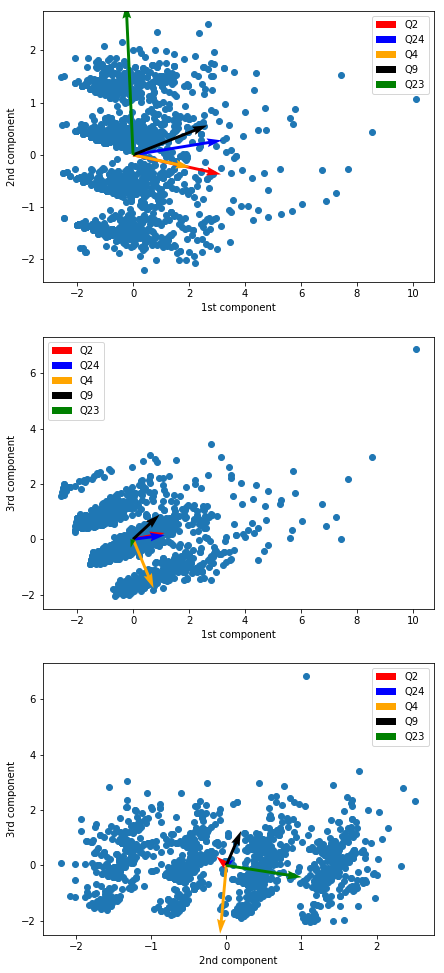

In [24]:
import matplotlib.pyplot as plt
colors=np.array(['red','blue','orange','black','green'])
fig=plt.figure(figsize=(7,17))
ax=plt.subplot(3,1,1)
origin = [0], [0]
ax.scatter(z[:,0],z[:,1])
plt.xlabel("1st component")
plt.ylabel("2nd component")
#This generates the vectors corresponding to each feature in the corresponding components:
for i in range(vectors_c1c2.shape[0]):
    plt.quiver(*origin,vectors_c1c2[i,0],vectors_c1c2[i,1], scale=2.5,label=X.columns[i],color=colors[i])
plt.legend()
plt.subplot(3,1,2)
origin = [0], [0]
plt.scatter(z[:,0],z[:,2])
plt.xlabel("1st component")
plt.ylabel("3rd component")
#This generates the vectors corresponding to each feature in the corresponding components:
for i in range(vectors_c1c2.shape[0]):
    plt.quiver(*origin,vectors_c1c3[i,0],vectors_c1c3[i,1], scale=7.0,label=X.columns[i],color=colors[i])
plt.legend()
plt.subplot(3,1,3)
origin = [0], [0]
plt.scatter(z[:,1],z[:,2])
plt.xlabel("2nd component")
plt.ylabel("3rd component")
#This generates the vectors corresponding to each feature in the corresponding components:
for i in range(vectors_c1c2.shape[0]):
    plt.quiver(*origin,vectors_c2c3[i,0],vectors_c2c3[i,1], scale=5.0,label=X.columns[i],color=colors[i])
plt.legend()


Based on those 3 graphs, Bob decided to make 4 groups. Observing the first graph, Bob decided to make the groups as following:
- from -2.5 to -1 on the second component
- from -1 to 0 on the second component
- from 0 to 1 on the second component
- from 1to 2.5 on the second component

Why on the second component? Bob  observed that four groups could be seen clearly in the 3 graphs. Also, he could see that the first component had an important weight from the feature corresponding to the quetion Q4; and that the second component had an important weight from the feature corresponding to the quetion Q23 . According to that,for a point with a high value on the second component, the corresponding woman spends more time actively coding 

In [25]:
print('Q23:'+multipleCh_init.Q23.iloc[0])
print('Q4:'+multipleCh_init.Q4.iloc[0])

Q23:Approximately what percent of your time at work or school is spent actively coding?
Q4:What is the highest level of formal education that you have attained or plan to attain within the next 2 years?


For Bob the grouping correponding to the second component seemed less predictable and more interesting. ' Peter must have thought the same thing' thought Bob. He called again to the T-shirts agency and no one answered. Using this grouping was the best shot Bob had to keep his job.Being  sure about his work, Bob decided to use  more information in order to know things about the members of each grouping, so that he could serve the better, and also for curiosity.FirSt, he made a function that generates reduced histograms:

In [26]:
def histo(nombres):  #nombres= variable for which we want to generate the histogram 
    a=np.unique(nombres) #gets all posible values for the variable
    cont=np.zeros(len(a)) # we are  going to count the # of apperances for every possible value
    l=list(nombres) # we transform to list, to use the function count
    for i in range(len(a)):           
        cont[i]= l.count(a[i])   
    mas=a[cont>5] # we will keep the ones that have more than 5 appearences in order to make
    #histograms better visualy (5 is totally arbitrary)
    nombres_mas=[]
    for i in range(len(nombres)):
        if(nombres[i] in mas):
            nombres_mas.append(nombres[i])
    h=plt.hist(nombres_mas,bins=len(mas),density=True)
    plt.xticks(rotation='vertical')
    

And finally he made the histograms for the 3 remaining variables of the survey and taking into account the 4 groups defined previously. 

In [27]:
def graficas(variable):
    figura=plt.figure(figsize=(26,25))
    limits=[-2.5,-1.0,0.0,1.0,2.5]
    for i in range(len(limits)-1):
        var_corte=X[str(variable)][(z[:,1]>limits[i]) & (z[:,1]<limits[i+1])]
        var_corte1=np.array(var_corte)
        plt.subplot(4,1,i+1)
        h=histo(var_corte1)
        plt.title("["+str(limits[i])+","+str(limits[i+1])+"]") #on the top of every histogram
        #is shown the corresponding interval from the second component
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=2.5)

The question Q3 was:

on the top of every histogram is shown the corresponding interval from the second component 
Q3:In which country do you currently reside?


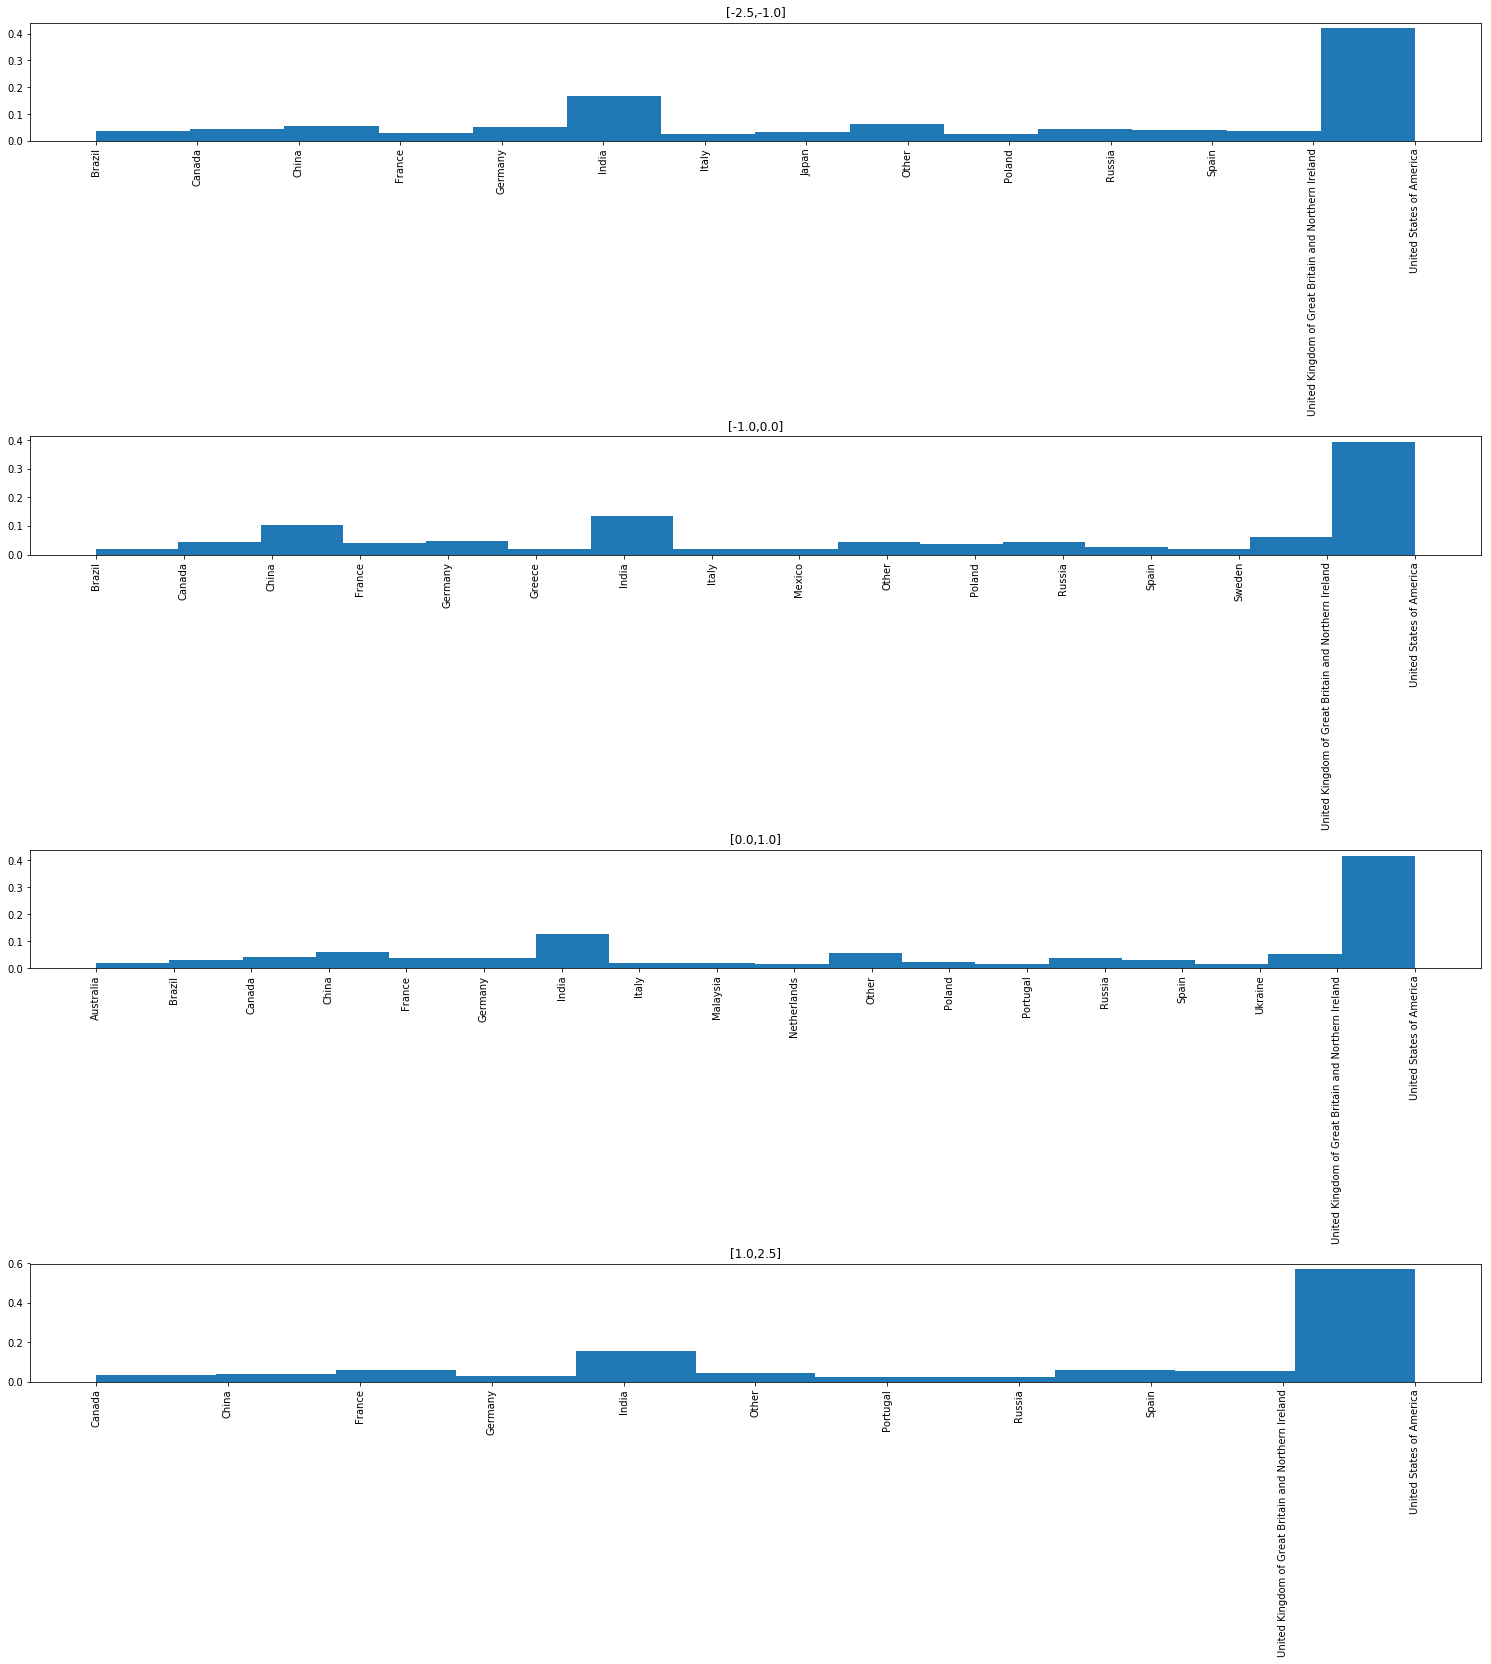

In [28]:
print('on the top of every histogram is shown the corresponding interval from the second component ') 
#is shown the corresponding interval from the second component )
print('Q3:'+multipleCh_init.Q3.iloc[0])
graficas('Q3')#on the top of every histogram 
#is shown the corresponding interval from the second component 
#(remenber, this component) has an important weight from the feature of question Q23

According to the previous histograms, Bob  concluded that in every group there was a majority of women from the United States; and in a second instance, from India. Besides, he observed that chinese women had the tendency to be more moderated with the time they spend actively coding( they  have a bigger proportion in the second histogram). 

The question Q17 was:

on the top of every histogram is shown the corresponding interval from the second component 
Q17:What specific programming language do you use most often? - Selected Choice


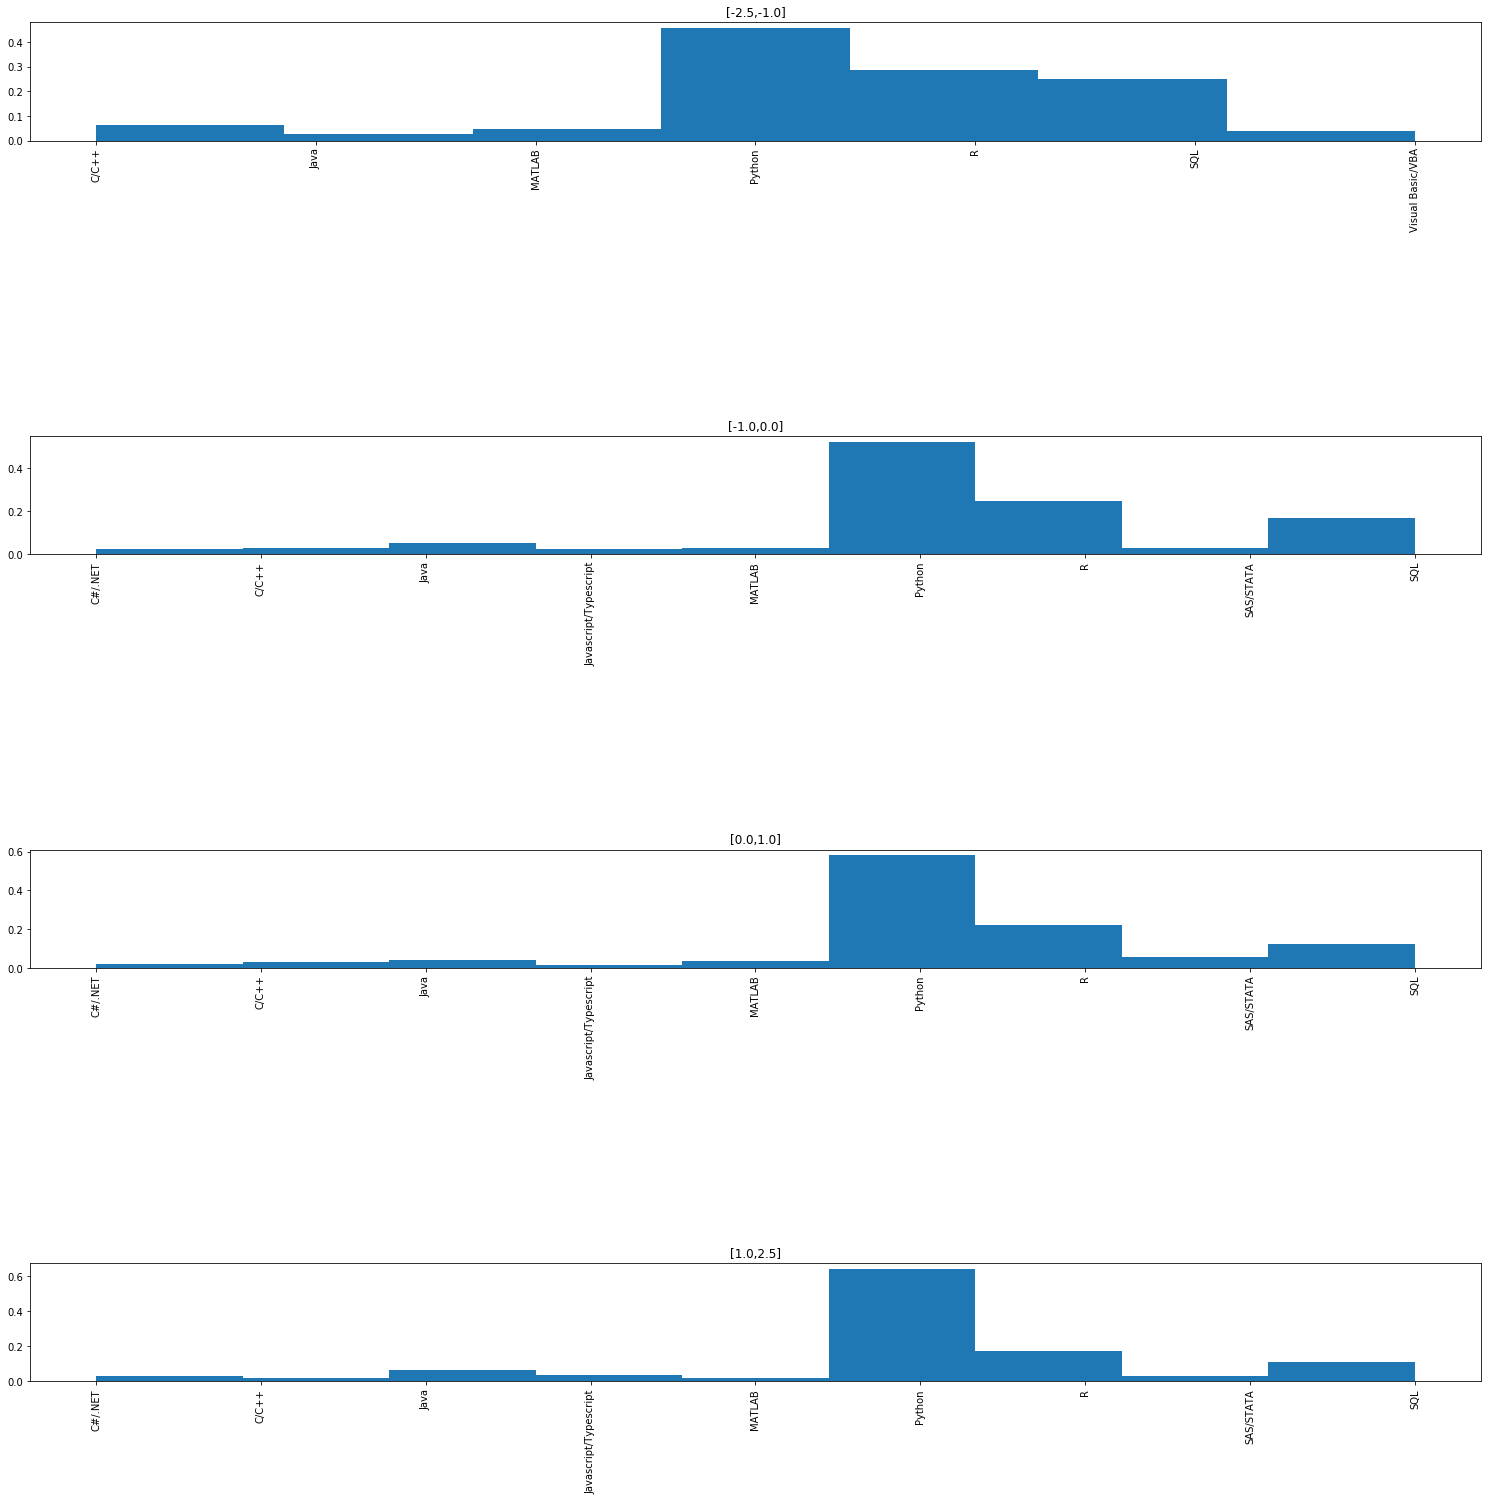

In [29]:
print('on the top of every histogram is shown the corresponding interval from the second component ') 
print('Q17:'+multipleCh_init.Q17.iloc[0])
graficas('Q17')#on the top of every histogram 
#is shown the corresponding interval from the second component

From the previous histograms, Bob concluded that for the women that spent less  time coding, the  proportion of the languages R and SQl users was more important than for other groups. 

The question Q5 was:

on the top of every histogram is shown the corresponding interval from the second component 
Q5:Which best describes your undergraduate major? - Selected Choice


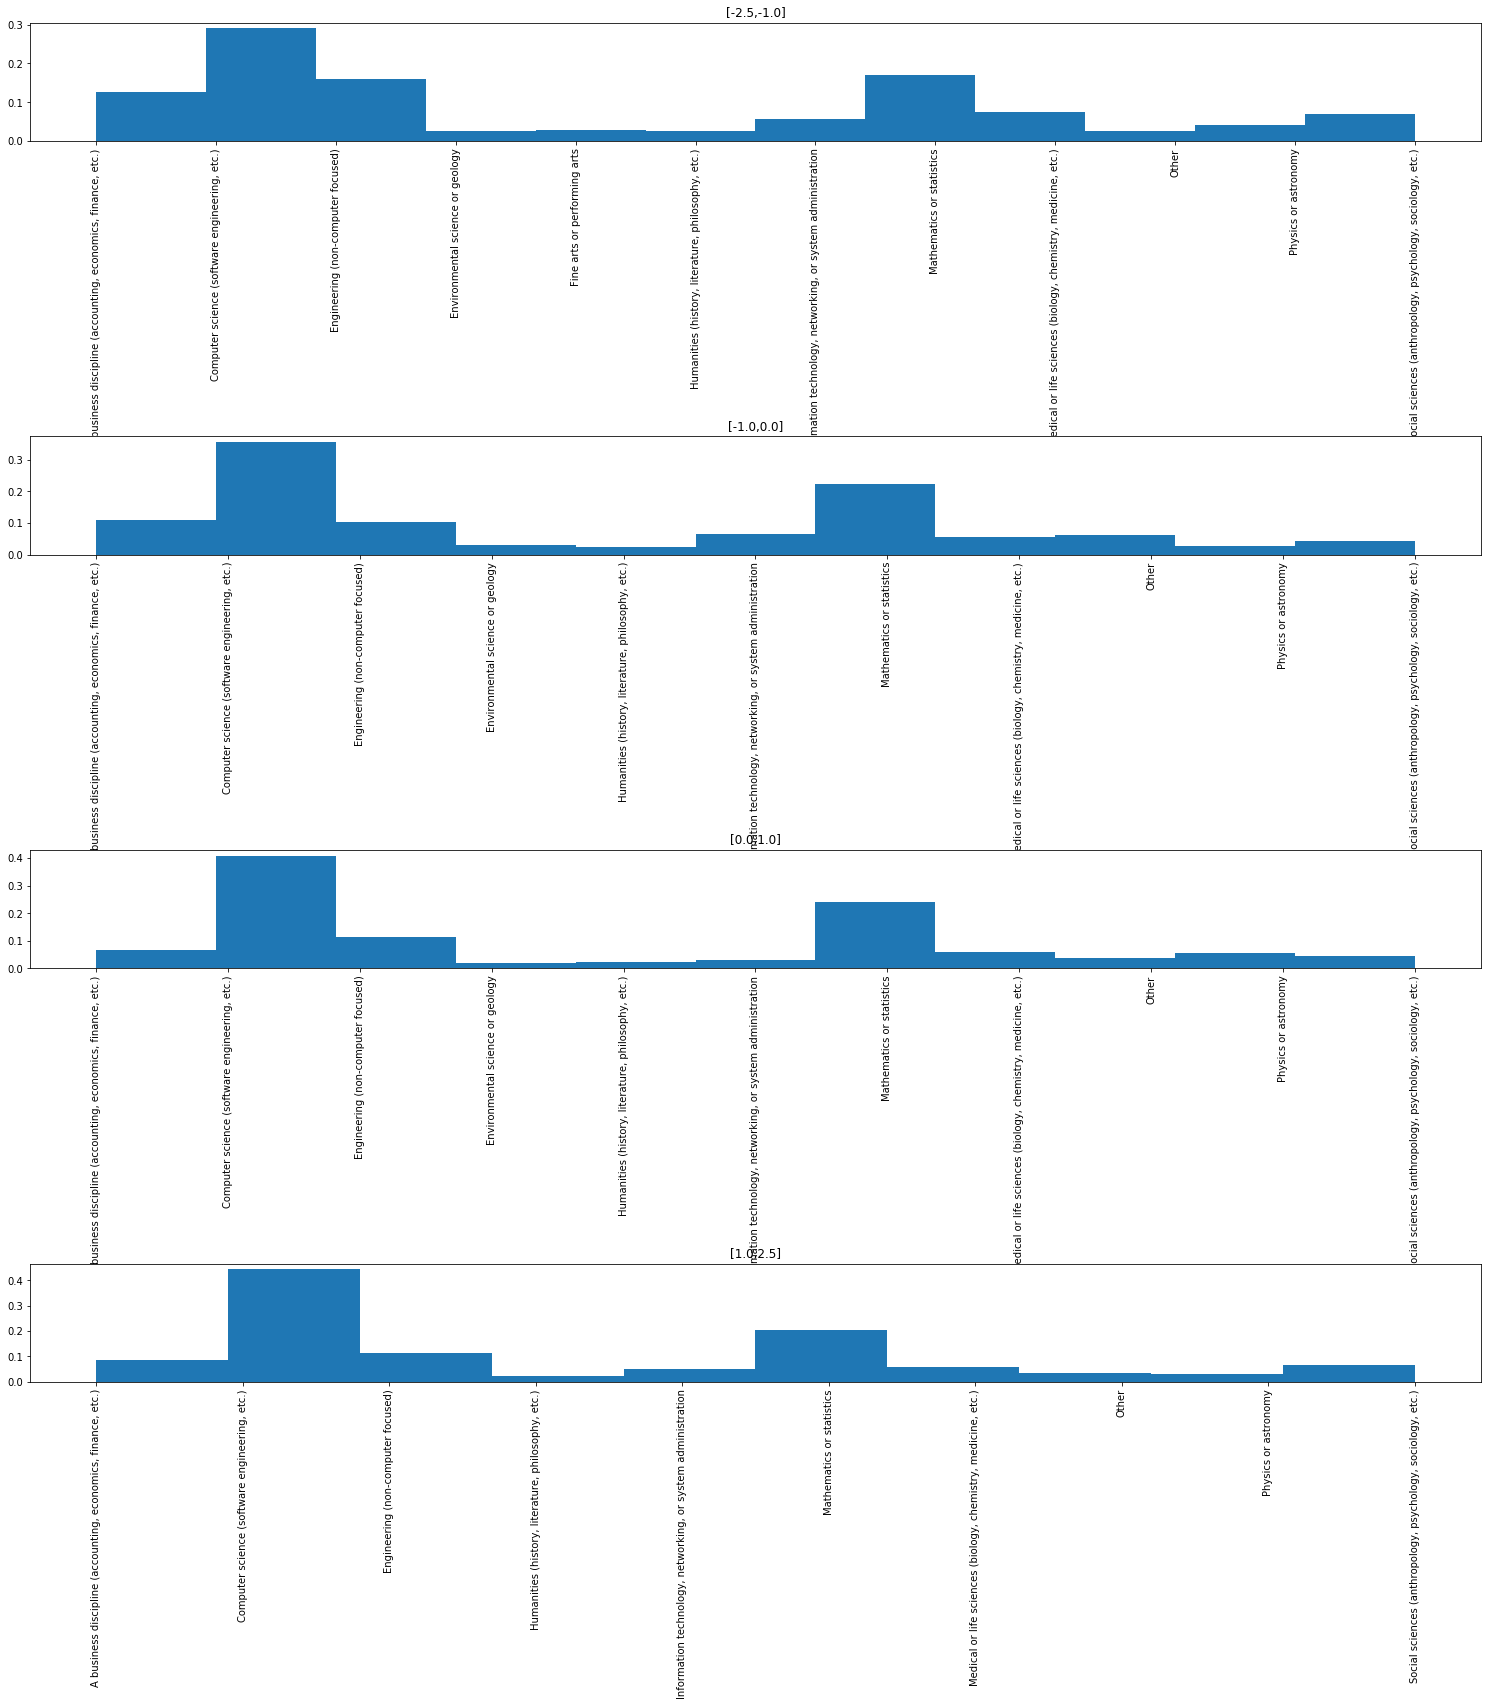

In [30]:
print('on the top of every histogram is shown the corresponding interval from the second component ') 
print('Q5:'+multipleCh_init.Q5.iloc[0])
graficas('Q5')#on the top of every histogram 
#is shown the corresponding interval from the second component

From the previous histograms, Bob concluded that for the group in which women spent less time coding (1st histogram) the proportion of women having a major in business  disciplines and engineering was bigger than for the other 3 groups.

At the end, Bob did a great jod and he was hired for the next event: 'Young people in data science and machine learning' 